In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import itertools 
from PIL import Image

In [2]:
df_ = pd.read_pickle('/Users/maffeitheo/Documents/GitHub/ada-2022-project-error141/data/3601_3680_.pkl')

In [25]:
df_all = pd.read_pickle('/Users/maffeitheo/Documents/process.pkl')

In [26]:
df_all.head(5)

,name,mention,release_date,gender,age,active,passive,activeness_score
4572965,beth,36,2007.0,F,28.0,"[sketch, join, travel+prep, check, inherit, le...","[convince, approach, share, surround, take+pre...",0.571429
4572965,whitney,18,2007.0,F,27.0,"[sketch, join, sketch, join, travel+prep, chec...","[convince, convince, talk, strap+prep, take+pr...",0.500000
4572965,stuart,13,2007.0,M,44.0,"[approach, share, enter, explain, untie, decid...","[seduce, fight, chain, chain, drive, leave]",0.647059
4572965,man who has victim chained electrified metal bed,12,NaN,M,NaN,"[chain+prep,eat]",[chain+prep],0.500000
4572965,todd,10,2007.0,M,48.0,"[terrorize, lose, do, try, remind, leave, do, ...","[submit, remind, obligate, leave, kill, maul]",0.571429


### add movie ID to each character 

In [3]:
a = list(itertools.chain(*[np.repeat(df_.iloc[i].movie_id, df_.iloc[i].nlp.shape[0]) for i in range(0, df_.shape[0])]))

In [4]:
df_.drop('movie_id', inplace=True, axis=1)

In [8]:
df = pd.concat([x for x in df_.nlp])

In [25]:
df['movie_id'] = a

In [54]:
df_F = df[df['gender'] == 'F']['active']
df_M = df[df['gender'] == 'M']['active']

In [36]:
df_F_adj = df[df['gender'] == 'F']['description']
df_M_adj = df[df['gender'] == 'M']['description']

### cut +prep term in verbs

In [30]:
def cut_prep_term(list_verbs):
    return[(x[:x.index("+")]) if ("+" in x) else x  for x in list_verbs]


In [31]:
df_all['active'] = df_all['active'].apply(lambda x : cut_prep_term(x))
df_all['passive'] = df_all['passive'].apply(lambda x : cut_prep_term(x))

In [32]:
df_all.head(10)

,name,mention,release_date,gender,age,active,passive,activeness_score
4572965,beth,36,2007.0,F,28.0,"[sketch, join, travel, check, inherit, leave, ...","[convince, approach, share, surround, take, ta...",0.571429
4572965,whitney,18,2007.0,F,27.0,"[sketch, join, sketch, join, travel, check, tr...","[convince, convince, talk, strap, take, strap,...",0.500000
4572965,stuart,13,2007.0,M,44.0,"[approach, share, enter, explain, untie, decid...","[seduce, fight, chain, chain, drive, leave]",0.647059
4572965,man who has victim chained electrified metal bed,12,NaN,M,NaN,[chain],[chain],0.500000
4572965,todd,10,2007.0,M,48.0,"[terrorize, lose, do, try, remind, leave, do, ...","[submit, remind, obligate, leave, kill, maul]",0.571429
4572965,lorna,8,2007.0,F,24.0,"[sketch, join, sketch, join, travel, check, tr...","[convince, convince, take, wait, hang, lie]",0.600000
4572965,axelle,7,2007.0,F,31.0,"[convince, volunteer, stay, go, ward, contract]","[join, lure, behead, allow, appear, appear]",0.500000
4572965,named bathory,6,NaN,F,NaN,"[use, revel]",[],1.000000
4572965,sasha,5,2007.0,M,61.0,"[relax, ward, murder]","[deliver, get, appear, appear]",0.428571
4572965,art class,3,2007.0,F,58.0,"[sketch, join, travel, check]",[convince],0.800000


In [24]:
def cut_prep_term(list_verbs):
    return[(x[:x.index("+")]) if ("+" in x) else x  for x in list_verbs]


### images with words 

In [3]:
df_one_film = df_.nlp[0]

In [4]:
df_one_film_M = df_one_film[df_one_film['gender'] == 'M']['active']
df_one_film_F = df_one_film[df_one_film['gender'] == 'F']['active']

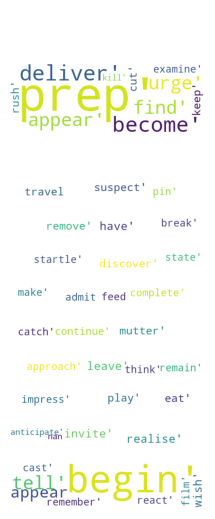

In [177]:
#mask = np.array(Image.open('/Users/maffeitheo/Desktop/prova.png'))

comment_words = ''
stopwords = set(STOPWORDS)

 
# iterate through the csv file
for val in df_one_film_M:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords, 
                mask = mask,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

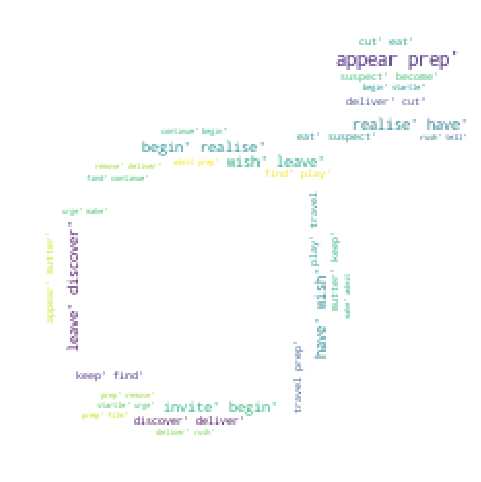

In [11]:
mask = np.array(Image.open('/Users/maffeitheo/Desktop/male_symbol.png'))
comment_words = ''
stopwords = set(STOPWORDS)

for val in df_one_film_M:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 


wc = WordCloud(background_color = "white", max_words=2000, max_font_size=50, mask=mask, stopwords = STOPWORDS,
               random_state=1,height=100,width=100,collocation_threshold=5).generate(comment_words)


# Finally generate the wordcloud of the given text
#wc.generate(text) 
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wc, interpolation = "None")
 
# Off the x and y axis
plt.axis('off')
 
# Now show the output cloud
plt.show()